In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8')  # Estilo predeterminado moderno
sns.set_palette("husl")        # Paleta de colores para Seaborn
%matplotlib inline

In [2]:
np.random.seed(42)

horas = pd.date_range('2023-06-01', periods=24, freq='H')
datos = {
    'Hora': horas,
    'Voltaje': np.random.normal(220, 5, 24),
    'Corriente': np.random.gamma(5, 0.5, 24),
    'Potencia': np.random.uniform(1000, 5000, 24),
    'Fase': np.random.choice(['R', 'S', 'T'], 24)
}
df = pd.DataFrame(datos).set_index('Hora')

/tmp/ipykernel_145596/3062943759.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  horas = pd.date_range('2023-06-01', periods=24, freq='H')


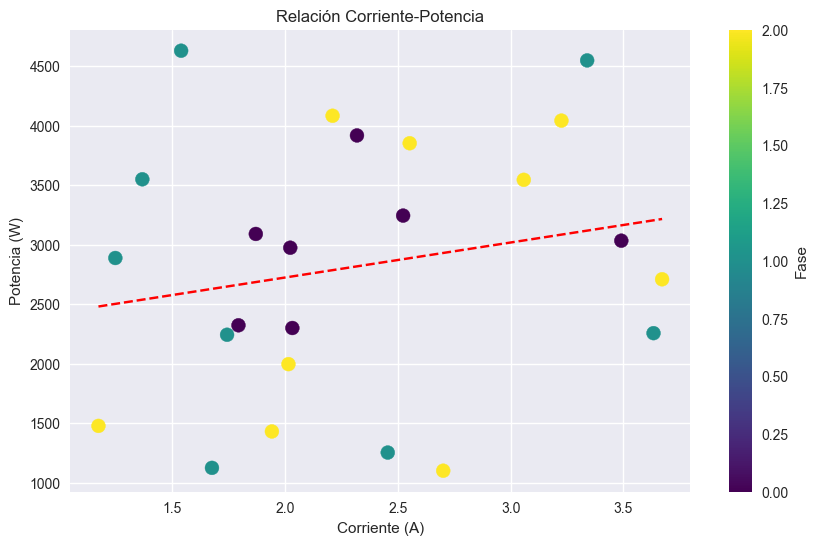

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Corriente'], df['Potencia'], 
            c=pd.factorize(df['Fase'])[0], # Codifica R/S/T como 0/1/2
            cmap='viridis',                # Mapa de color
            s=100)                         # Tamaño de puntos
plt.colorbar(label='Fase')
plt.plot(np.unique(df['Corriente']), 
         np.poly1d(np.polyfit(df['Corriente'], df['Potencia'], 1))(np.unique(df['Corriente'])),
         'r--')  # Línea de regresión (roja punteada)
plt.title('Relación Corriente-Potencia')
plt.xlabel('Corriente (A)')
plt.ylabel('Potencia (W)')
plt.show()

### Mostrar la ecuación de la recta de regresión.

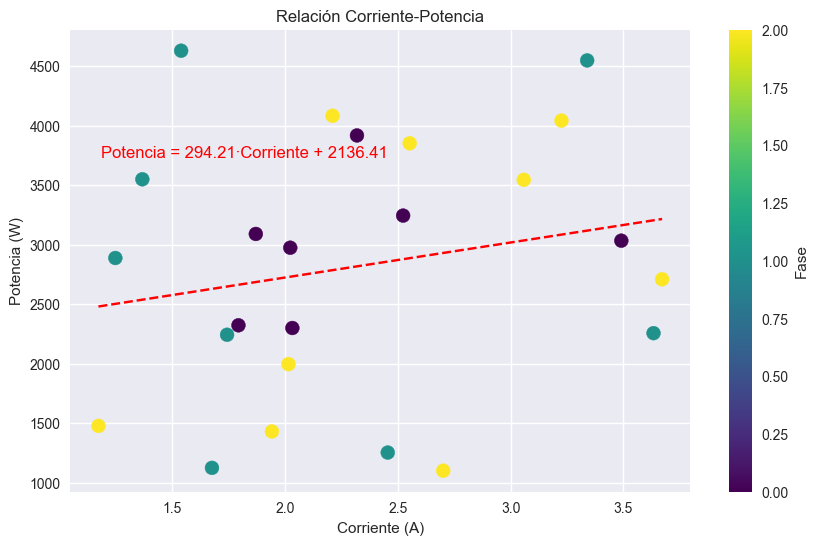

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Corriente'], df['Potencia'], 
            c=pd.factorize(df['Fase'])[0], cmap='viridis', s=100)
plt.colorbar(label='Fase')

# Línea de regresión <- NUEVO
coef = np.polyfit(df['Corriente'], df['Potencia'], 1) # Función de Numpy que nos da los coficientes.
x_vals = np.linspace(df['Corriente'].min(), df['Corriente'].max(), 100) # Genera las pregimágenes de la red
plt.plot(x_vals, np.poly1d(coef)(x_vals), 'r--') # Grafica la recta de mejor ajuste

# Ecuación
ecuacion = f'Potencia = {coef[0]:.2f}·Corriente + {coef[1]:.2f}'  # Se pueden editar las palabras o coeficientes
plt.text(0.05, 0.75, ecuacion, transform=plt.gca().transAxes,    # Los primeros números son posiciones porcentuales en x & y.
         fontsize=12, color='red', verticalalignment='top')

plt.title('Relación Corriente-Potencia')
plt.xlabel('Corriente (A)')
plt.ylabel('Potencia (W)')
plt.show()


### Poner etiqueta a un punto específico


Esto lo lograremos agregando el siguiente código. El punto se puede obtener de cualquier forma del Dataframe. Aquí se hará a partir de un índice, pero podemos también establecer que x_punto sea el máximo valor, el primero, el último, etc., utilizando las funciones de loc o iloc de Pandas.

```python
# Etiqueta en un punto específico
i = 3  # ESte es el índice del punto para el ejemplo
x_punto = df['Corriente'].iloc[i]
y_punto = df['Potencia'].iloc[i]
plt.annotate(f'Punto {i}', xy=(x_punto, y_punto),  # plt.annotate es la función de poner la etiqueta
             xytext=(x_punto + 1, y_punto + 1),  # Desplaza el texto ligeramente para que no tape el punto
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, color='black')  # tamaño de letra y color
```

Lo anterior se puede ubicar antes del plot.show(), que es lo que finalmente genera el gráfico con todas las indicaciones anteriores.

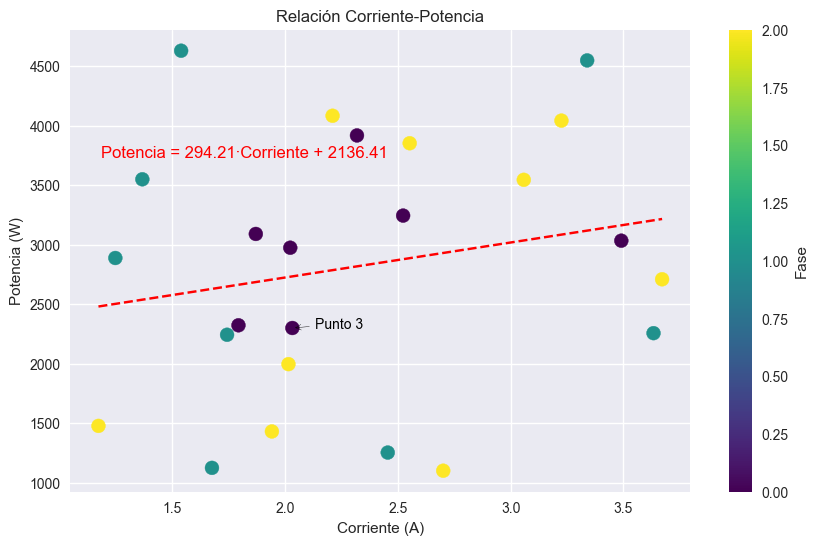

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Corriente'], df['Potencia'], 
            c=pd.factorize(df['Fase'])[0], cmap='viridis', s=100)
plt.colorbar(label='Fase')

# Línea de regresión <- NUEVO
coef = np.polyfit(df['Corriente'], df['Potencia'], 1) # Función de Numpy que nos da los coficientes.
x_vals = np.linspace(df['Corriente'].min(), df['Corriente'].max(), 100) # Genera las pregimágenes de la red
plt.plot(x_vals, np.poly1d(coef)(x_vals), 'r--') # Grafica la recta de mejor ajuste

# Ecuación
ecuacion = f'Potencia = {coef[0]:.2f}·Corriente + {coef[1]:.2f}'  # Se pueden editar las palabras o coeficientes
plt.text(0.05, 0.75, ecuacion, transform=plt.gca().transAxes,    # Los primeros números son posiciones porcentuales en x & y.
         fontsize=12, color='red', verticalalignment='top')

plt.title('Relación Corriente-Potencia')
plt.xlabel('Corriente (A)')
plt.ylabel('Potencia (W)')

i = 3  # ESte es el índice del punto para el ejemplo
x_punto = df['Corriente'].iloc[i]
y_punto = df['Potencia'].iloc[i]
plt.annotate(f'Punto {i}', xy=(x_punto, y_punto),  # plt.annotate es la función de poner la etiqueta
             xytext=(x_punto + 0.1, y_punto + 0.1),  # Desplaza el texto ligeramente para que no tape el punto
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, color='black')  # tamaño de letra y color

plt.show()

### Utilizar colores RGB

La biblioteca para utilizar, además de los esquemas de colores que trae Matplotlib como opciones, es ListedColormap:

```python
from matplotlib.colors import ListedColormap
```

Con esta podemos poner los colores que queramos, como:


```python
# Codifica las fases como 0, 1, 2
fase_codificada, fases = pd.factorize(df['Fase'])

# Define colores RGB para cada fase (R, G, B) en el rango [0, 1]
colores_rgb = [
    (1.0, 0.0, 0.0),   # rojo puro
    (0.0, 1.0, 0.0),   # verde puro
    (0.0, 0.0, 1.0)    # azul puro
]


cmap_personalizado = ListedColormap(colores_rgb)
```

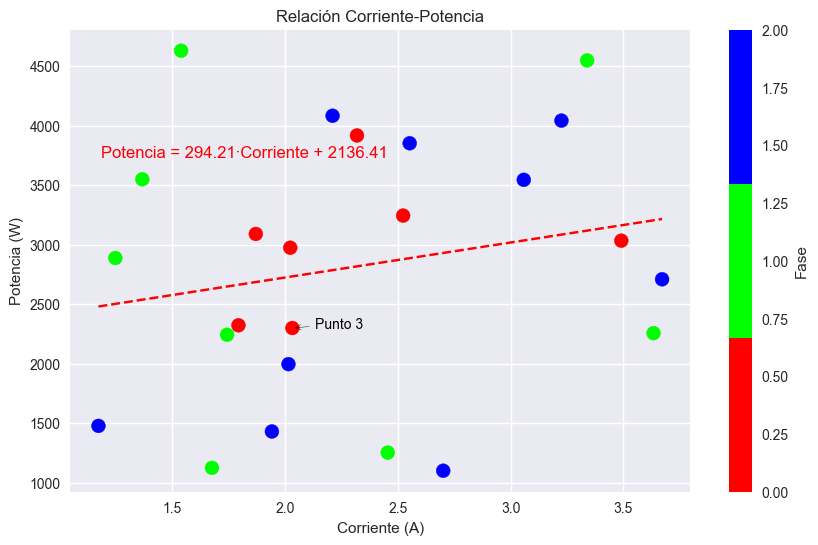

In [28]:
from matplotlib.colors import ListedColormap

# Codifica las fases como 0, 1, 2
fase_codificada, fases = pd.factorize(df['Fase'])

# Define colores RGB para cada fase (R, G, B) en el rango [0, 1]
colores_rgb = [
    (1.0, 0.0, 0.0),   # rojo puro
    (0.0, 1.0, 0.0),   # verde puro
    (0.0, 0.0, 1.0)    # azul puro
]


cmap_personalizado = ListedColormap(colores_rgb)

# A partir de aquí semejante a lo anterior

plt.figure(figsize=(10, 6))
plt.scatter(df['Corriente'], df['Potencia'], 
            c=pd.factorize(df['Fase'])[0], cmap=cmap_personalizado, s=100) # Aquí se indicó que utilizalos lo personalizado
plt.colorbar(label='Fase')

# Línea de regresión <- NUEVO
coef = np.polyfit(df['Corriente'], df['Potencia'], 1) # Función de Numpy que nos da los coficientes.
x_vals = np.linspace(df['Corriente'].min(), df['Corriente'].max(), 100) # Genera las pregimágenes de la red
plt.plot(x_vals, np.poly1d(coef)(x_vals), 'r--') # Grafica la recta de mejor ajuste

# Ecuación
ecuacion = f'Potencia = {coef[0]:.2f}·Corriente + {coef[1]:.2f}'  # Se pueden editar las palabras o coeficientes
plt.text(0.05, 0.75, ecuacion, transform=plt.gca().transAxes,    # Los primeros números son posiciones porcentuales en x & y.
         fontsize=12, color='red', verticalalignment='top')

plt.title('Relación Corriente-Potencia')
plt.xlabel('Corriente (A)')
plt.ylabel('Potencia (W)')

i = 3  # ESte es el índice del punto para el ejemplo
x_punto = df['Corriente'].iloc[i]
y_punto = df['Potencia'].iloc[i]
plt.annotate(f'Punto {i}', xy=(x_punto, y_punto),  # plt.annotate es la función de poner la etiqueta
             xytext=(x_punto + 0.1, y_punto + 0.1),  # Desplaza el texto ligeramente para que no tape el punto
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, color='black')  # tamaño de letra y color

plt.show()

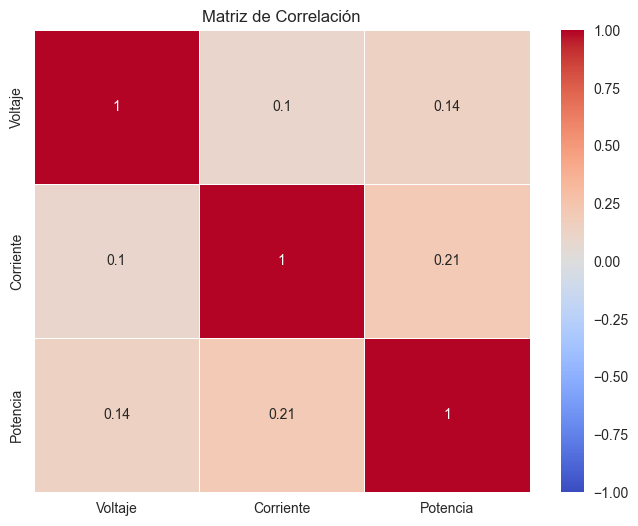

In [29]:
corr = df[['Voltaje', 'Corriente', 'Potencia']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Usar colores personalizados: 


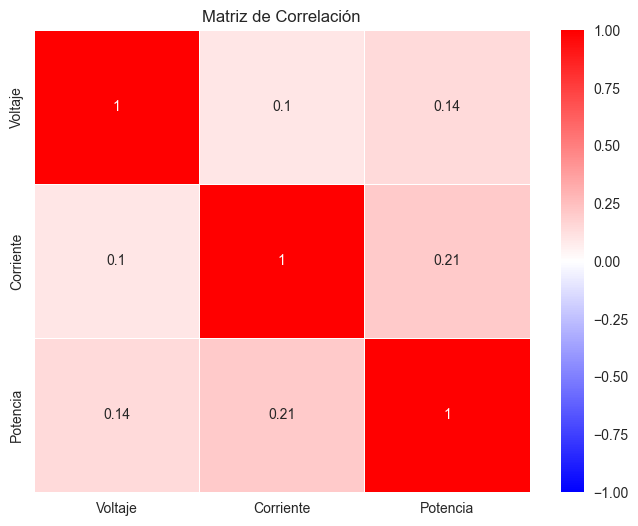

In [38]:
from matplotlib.colors import LinearSegmentedColormap # Nueva biblioteca

corr = df[['Voltaje', 'Corriente', 'Potencia']].corr()
plt.figure(figsize=(8, 6))
# Crear un colormap RGB personalizado (de azul a blanco a rojo)
colores_rgb = [
    (0.0, 0.0, 1.0),  # azul
    (1.0, 1.0, 1.0),  # blanco
    (1.0, 0.0, 0.0)   # rojo
]


cmap_personalizado = LinearSegmentedColormap.from_list('mi_cmap', colores_rgb, N=256)

sns.heatmap(corr, annot=True, cmap=cmap_personalizado, vmin=-1, vmax=1, linewidths=0.5)


plt.title('Matriz de Correlación')
plt.show()

## Nota: 

Podemos ver: 

https://htmlcolorcodes.com/


Aquí usualmente los códigos están en escala 0-255. Para usarlos, podemos por ejemplo, dividir cada valor entre 255

```python
colores_rgb = [
    (0/255, 32/255, 96/255),   # azul oscuro
    (255/255, 255/255, 255/255),  # blanco
    (255/255, 165/255, 0/255)  # naranja
]
```



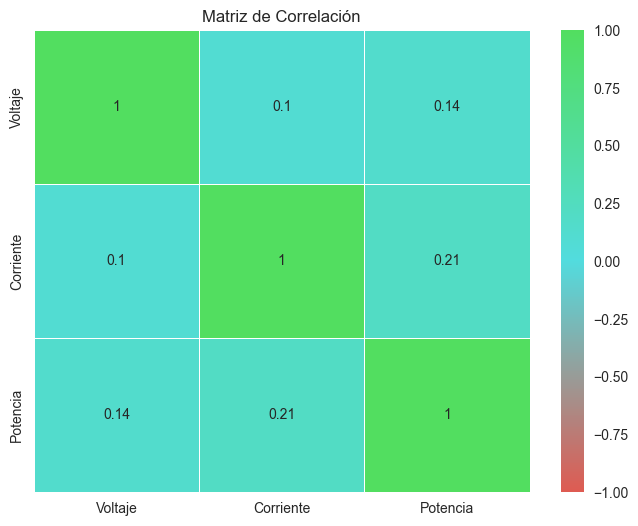

In [40]:
corr = df[['Voltaje', 'Corriente', 'Potencia']].corr()
plt.figure(figsize=(8, 6))
# Crear un colormap RGB personalizado (de azul a blanco a rojo)
colores_rgb = [
    (222/255, 91/255, 82/255),  
    (82/255, 220/255, 222/255),  # blanco
    (82/255, 222/255, 96/255)   # rojo
]


cmap_personalizado = LinearSegmentedColormap.from_list('mi_cmap', colores_rgb, N=256)

sns.heatmap(corr, annot=True, cmap=cmap_personalizado, vmin=-1, vmax=1, linewidths=0.5)


plt.title('Matriz de Correlación')
plt.show()